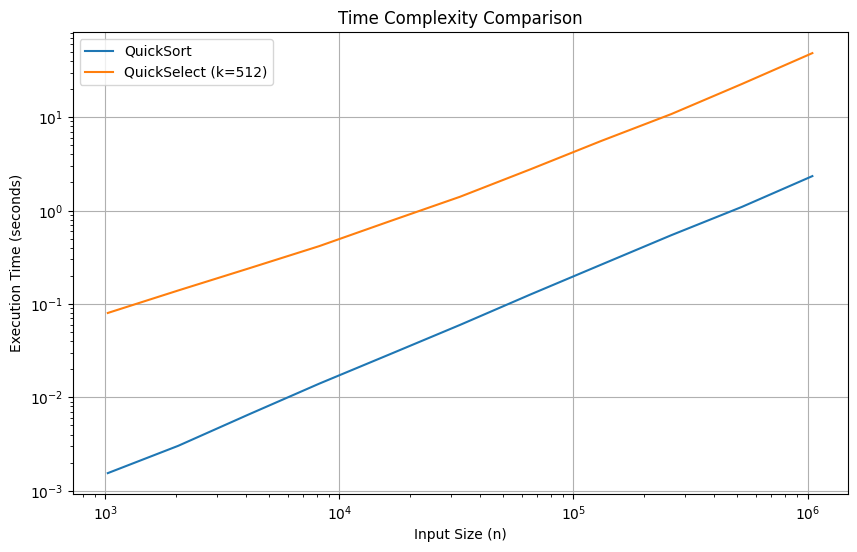

In [1]:
import random
import time
import matplotlib.pyplot as plt

def custom_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[random.randint(0, len(arr) - 1)]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return custom_sort(left) + middle + custom_sort(right)

def custom_select(arr, k):
    if len(arr) == 1:
        return arr[0]

    pivot = arr[random.randint(0, len(arr) - 1)]
    left = [x for x in arr if x < pivot]
    right = [x for x in arr if x > pivot]
    pivot_count = len(arr) - len(left) - len(right)

    if k < len(left):
        return custom_select(left, k)
    elif k < len(left) + pivot_count:
        return pivot
    else:
        return custom_select(right, k - len(left) - pivot_count)

input_sizes = [2**i for i in range(10, 21)]  # Input sizes from 2^10 to 2^20
custom_sort_times = []
custom_select_times = []

for n in input_sizes:
    arr = [random.randint(1, 1000000) for _ in range(n)]
    a = arr.copy()

    start_time = time.time()
    custom_sort(arr)
    end_time = time.time()
    custom_sort_times.append(end_time - start_time)

    k = 512
    start_time = time.time()
    for _ in range(k):
        custom_select(a, k)
    end_time = time.time()
    custom_select_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, custom_sort_times, label='Custom Sort')
plt.plot(input_sizes, custom_select_times, label='Custom Select (k=512)')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity Comparison')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.show()
